# Lorenz equation. Butterfly effect article.

Article written by Jakhanov Sultanbek, Syrymbet Nuray, Aiym Kalmaganbet.

<img src = 'https://cdn.dribbble.com/users/3658786/screenshots/15044136/media/20e5d07fc46a102a86bffc6b574ae068.gif'></img>

## Navigation:
------
<a class='anchor-link' href = '#Definition:-Lorenz-equations.-Butterfly-effect.'></a>
[__1. Main definitions. Introduction to Lorenz Equations.__](#Definition:-Lorenz-equations.-Butterfly-effect.)
- 1.1. The Lorenz system.
- 1.2. Does the Flap of a Butterfly’s Wings in Brazil Set Off a Tornado in Texas?

<a class='anchor-link' href = '#Python-representation-of-the-problem.'></a>
[__2. Python representation of the problem.__](#Python-representation-of-the-problem.)
- 2.1. Importing the libraries.
- 2.2. Assigning variables and populations for problem. Giving initial conditions.
- 2.3. Defining the derivative function for equations and determinants of system.
- 2.4. Applying Runge-Kutta method to append values to arrays of our populations x,y,z.
- 2.5. Plotting the butterfly graph.

<a class='anchor-link' href = '#Matlab-representation-of-the-problem.'></a>
[__3. Matlab representation of the problem.__](#Matlab-representation-of-the-problem.)
- 3.1. Determining Lorenz function.
- 3.2. Plotting in MATLAB. Close look at the 3D diagram.

<a class='anchor-link' href = '#Our-overview-and-useful-links.'></a>
[__4. Overview and useful resources.__](#Our-overview-and-useful-links.)

## Definition: Lorenz equations. Butterfly effect.

### The Lorenz system. 

* The Lorenz system are a group of equations that show chaotic behavior for certain parameters, which most notably produce an interesting graph. The Lorenz equations are made up of three populations: x, y, and z, and three fixed coefficients: σ, ρ, and β.  First, it is non-linear in two places: the second equation has a xz term and the third equation has a xy term. It is made up of a very few simple components. The system is three-dimensional and deterministic. The equations that we are going to work with are the following

$$ \frac{dx}{dt} = \sigma(y-x) $$
$$ \frac{dy}{dt} = x(\rho-z)-y $$
$$ \frac{dz}{dt} = xy - \beta z $$

<img src='https://cdn.mos.cms.futurecdn.net/GZfL76QUfJYsMGkuqDmnBQ.jpg'>

### Does the Flap of a Butterfly’s Wings in Brazil Set Off a Tornado in Texas?
* Dr. Lorenz is best known for the notion (in 1969) of the “butterfly effect,” the idea that a small disturbance like the flapping of a butterfly’s wings can induce enormous consequences. His chaos discovery was accidental. One day, Dr. Lorenz was running simulations of weather using a simple computer model. Another day, he wanted to repeat one of the simulations for a longer time, but instead of repeating the whole simulation, he started the second run in the middle, typing in numbers from the first run for the initial conditions. The computer program was the same, so the weather patterns of the second run should have exactly followed those of the first. Instead, the two weather trajectories quickly diverged on completely separate paths.

* At first, he thought the computer was malfunctioning. Then he realized that he had not entered the initial conditions exactly. The computer stored numbers to an accuracy of six decimal places, like 0.506127, while, to save space, the printout of results shortened the numbers to three decimal places, 0.506. When typing in the new conditions, Dr. Lorenz had entered the rounded-off numbers, and even this small discrepancy, of less than 0.1 percent, completely changed the final result. Even though his model was vastly simplified, Dr. Lorenz realized that this meant perfect weather prediction was a fantasy. A perfect forecast would require not only a perfect model, but also perfect knowledge of wind, temperature, humidity and other conditions everywhere around the world at one moment of time. Even a small discrepancy could lead to completely different weather. In 1972, he gave a talk with a title that captured the essence of his ideas: “Predictability: Does the Flap of a Butterfly’s Wings in Brazil Set Off a Tornado in Texas?”

<img src='https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F293f7c41-62bf-4dd2-94f9-33e9e0ee8c54_660x360.png'></img>

<a class="anchor-link" href="#Navigation:"></a>
[__Go back to NAVIGATION__](#Navigation:)

## Python representation of the problem.

### Importing the libraries.
These will be the equations that we will plugging in to our derivative function so that we can apply the RK4 (Runge-Kutta Four-Step) method. First, we start off by importing the necessary packages.
- `matplotlib`  - to use pyplot functions that make some changes to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc;
- `numpy` - used for scientific computing, provides a multidimensional array object and more;
- `mpl_toolkits.mplot3d` - special collection of methods to create three-dimensional plots;

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Assigning variables and populations for problem. Giving initial conditions.

Then, we start with the variables we will be using for these equations. __Explanation__ to the piece of code below:

$ \sigma $ - variable for $ \frac{dx}{dt} $   &nbsp;&nbsp;&nbsp;&nbsp; t - starting time

$\rho$ - variable for $ \frac{dy}{dt} $   &nbsp;&nbsp;&nbsp;&nbsp; tf - ending time

$\beta$ - variable for $ \frac{dz}{dt} $ &nbsp;&nbsp;&nbsp;&nbsp; h - step size for RK4

<div class="alert alert-block alert-success">
<b>Up to you:</b> These variables were used since they can be easily found for comparison, for example, in Wikipedia under the Lorenz system article.
</div>

In [2]:
sigma = 10.0 
rho = 28.0
beta = 8/3 
t = 0
tf = 40
h = 0.01 

### Defining the derivative function for equations and determinants of system.

A quick refresher for the derivative function. `The r variable` is for the initial conditions set inside an array. We assign each variable with the values of the of the array, three in this case, and then the function will return the differential equations that were pictured at the beginning, but now with initial conditions. Each time loop goes through an iteration, the function will continue updating with new values, which will be stored in the following arrays.

In [4]:
#Derivative function to work with RK4 loop
def derivative(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    return np.array([sigma * (y - x), x * (rho - z) - y, (x * y) - (beta * z)])

In [7]:
time = np.array([]) #Empty time array to fill for the x-axis
x = np.array([]) #Empty array for x values
y = np.array([]) #Empty array for y values
z = np.array([]) #Empty array for z values
r = np.array([1.0, 1.0, 1.0]) #Initial conditions array

### Applying Runge-Kutta method.

Now, with our main pieces set, we just go ahead and apply everything inside the RK4 loop and we end up with. References to method:

<img src = 'https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/42a331fe-5819-4533-a6e9-bd371245a942/e2e3d3c6-d622-4808-b5be-8e4b243534e5/images/screenshot.png'></img>

In [8]:
while (t <= tf ):
        #Appending values to graph
        time = np.append(time, t)
        z = np.append(z, r[2])
        y = np.append(y, r[1])
        x = np.append(x, r[0])
        #RK4 Step method
        k1 = h*derivative(r,t)
        k2 = h*derivative(r+k1/2,t+h/2)
        k3 = h*derivative(r+k2/2,t+h/2)
        k4 = h*derivative(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
        #Updating time value with step size
        t = t + h

### Plotting the butterfly graph.
After running the loop, our arrays should be filled with an equal amount of values, so now we can just go ahead and plot these values so we can see how they produce the graphs below, using the following code.

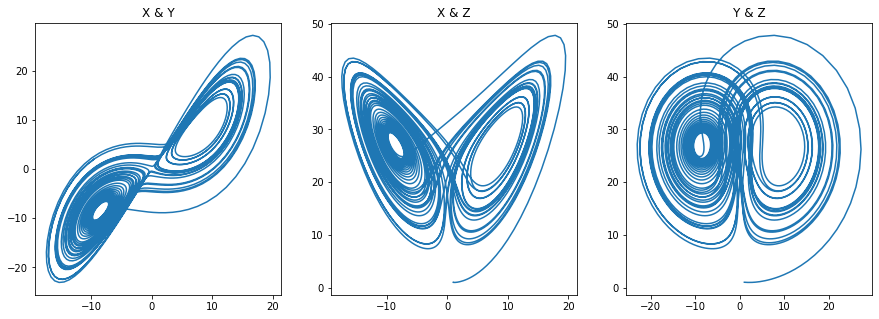

In [9]:
#Multiple graph plotting
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))
ax1.plot(x, y)
ax1.set_title("X & Y")
ax2.plot(x, z)
ax2.set_title("X & Z")
ax3.plot(y, z)
ax3.set_title("Y & Z")
plt.show()

<a class="anchor-link" href="#Navigation:"></a>
[__Go back to NAVIGATION__](#Navigation:)

## Matlab representation of the problem.

### Determining Lorenz function.

So, here we have samples of simple code and, firstly, do define `Beta` as the set of our determinants $\sigma$, $\rho$, $\beta$, while the `X` represents a set of populations x, y, z. Second of all, give them some values, fix options, use `ode45` the Runge-Kutta method of 4th degree as the base for calculations. Then plot out the Butterfly that we are able to look closely, shapeshift, turn in any way we want (xy, xz, yz, diaoganally and etc). How we already have done and explained in previous steps using Python Programming Language.

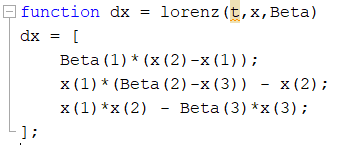
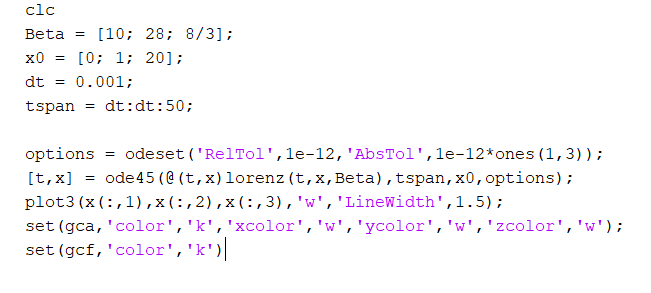

### Close look at the three-dimensional plot.

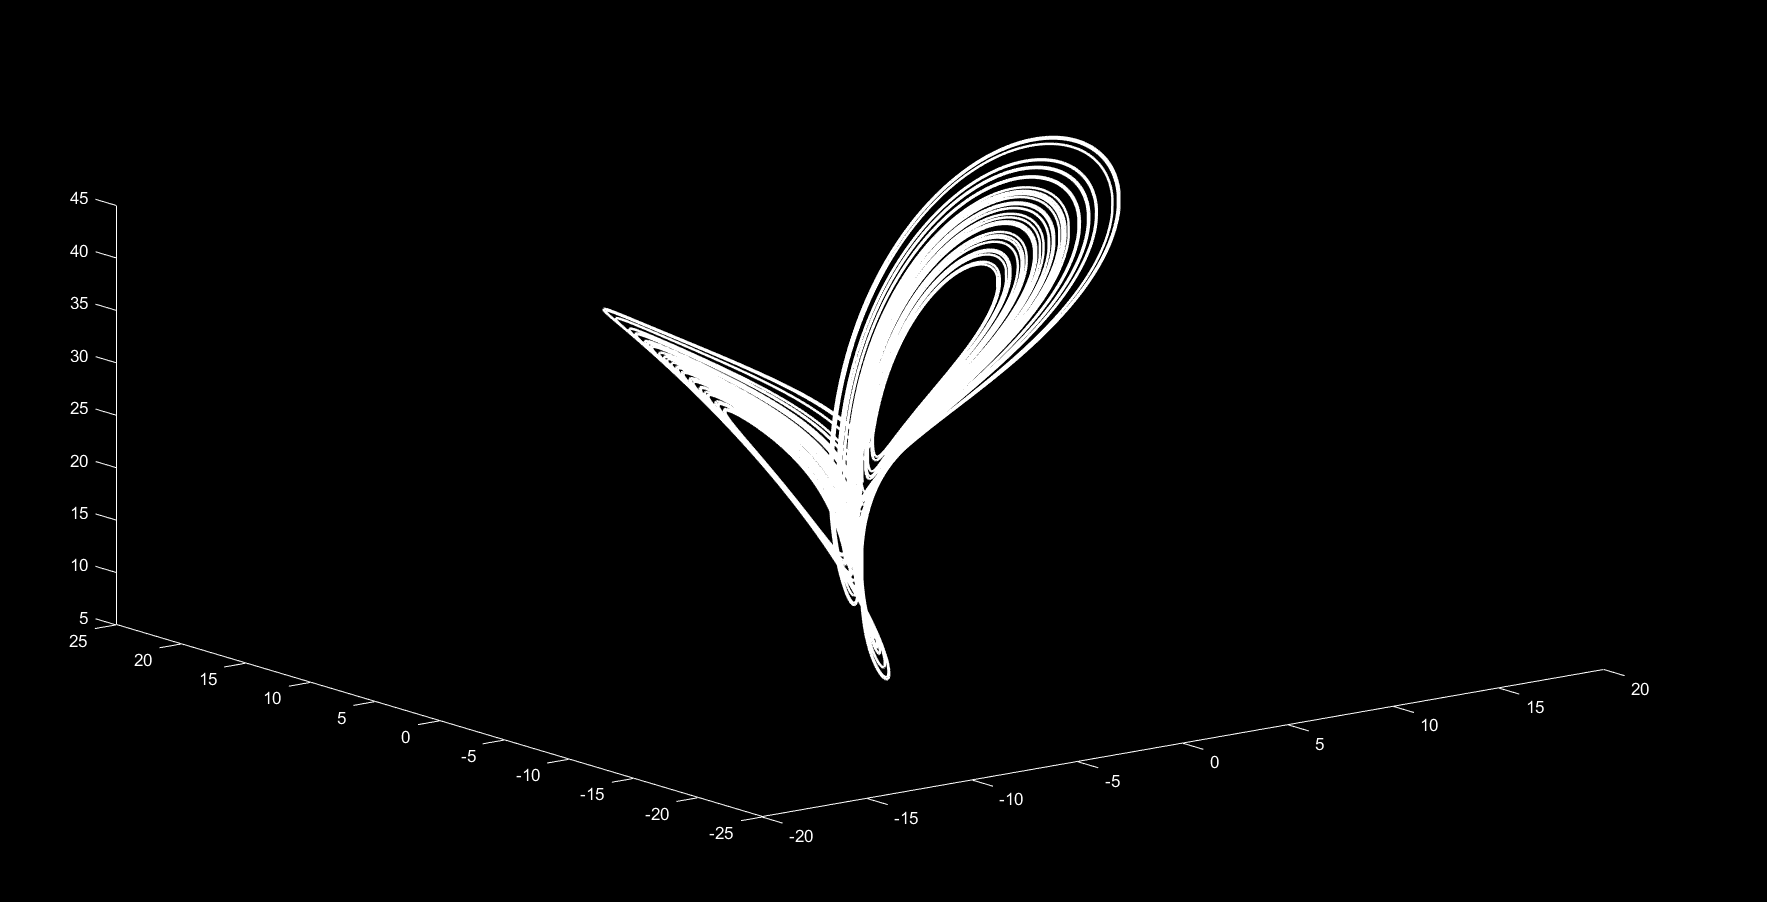
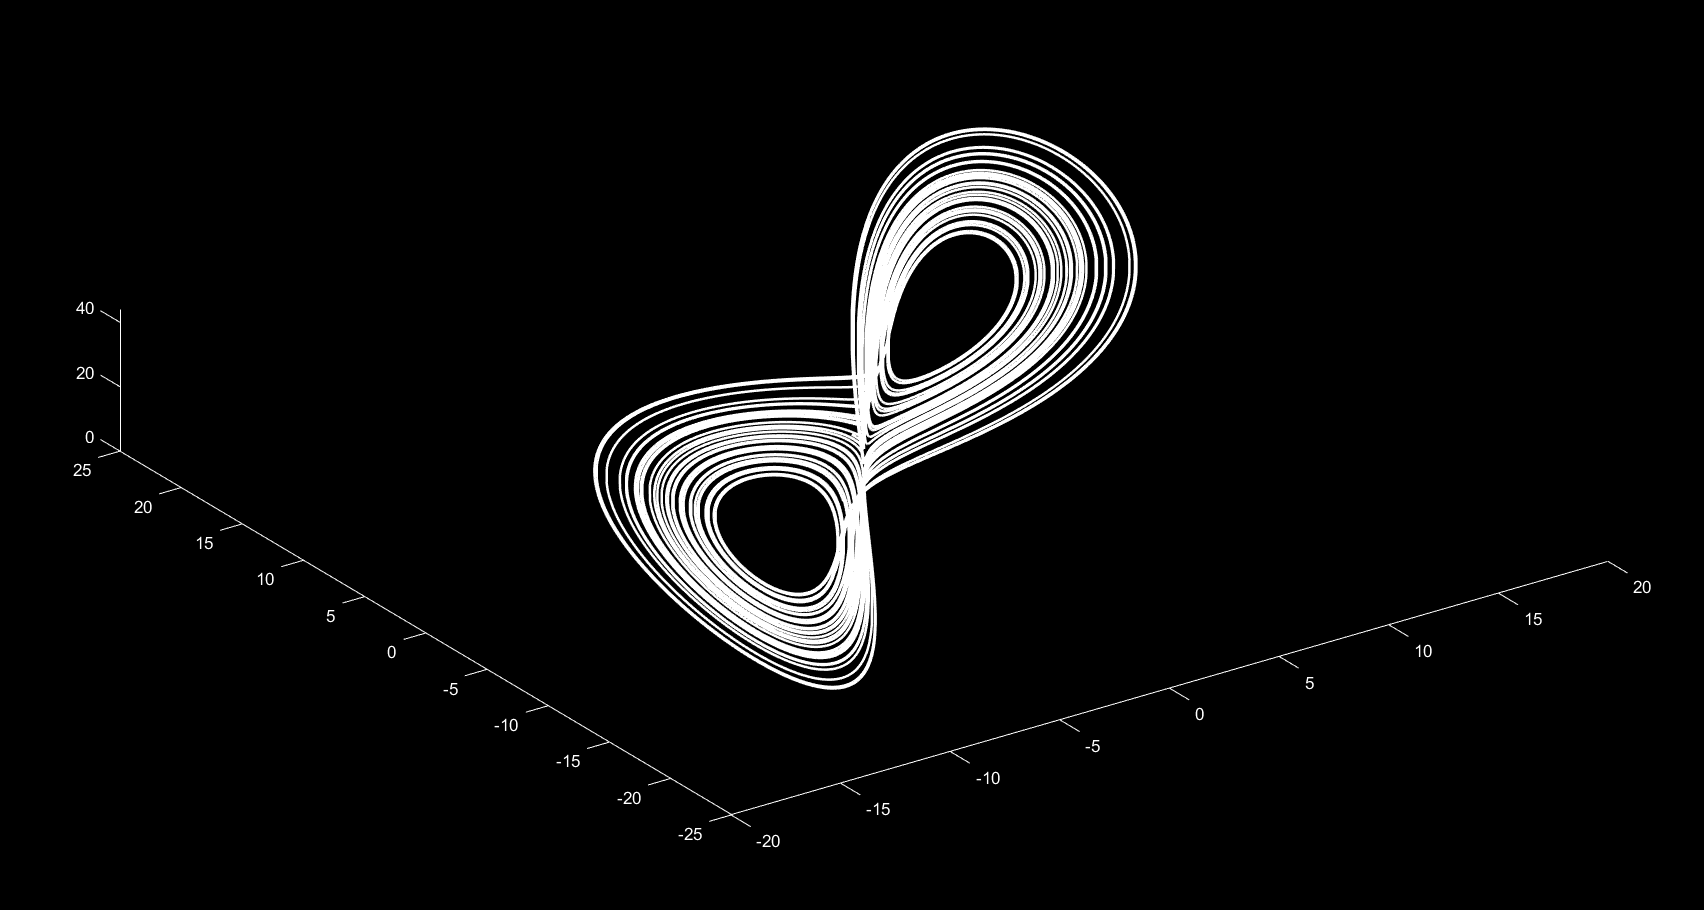
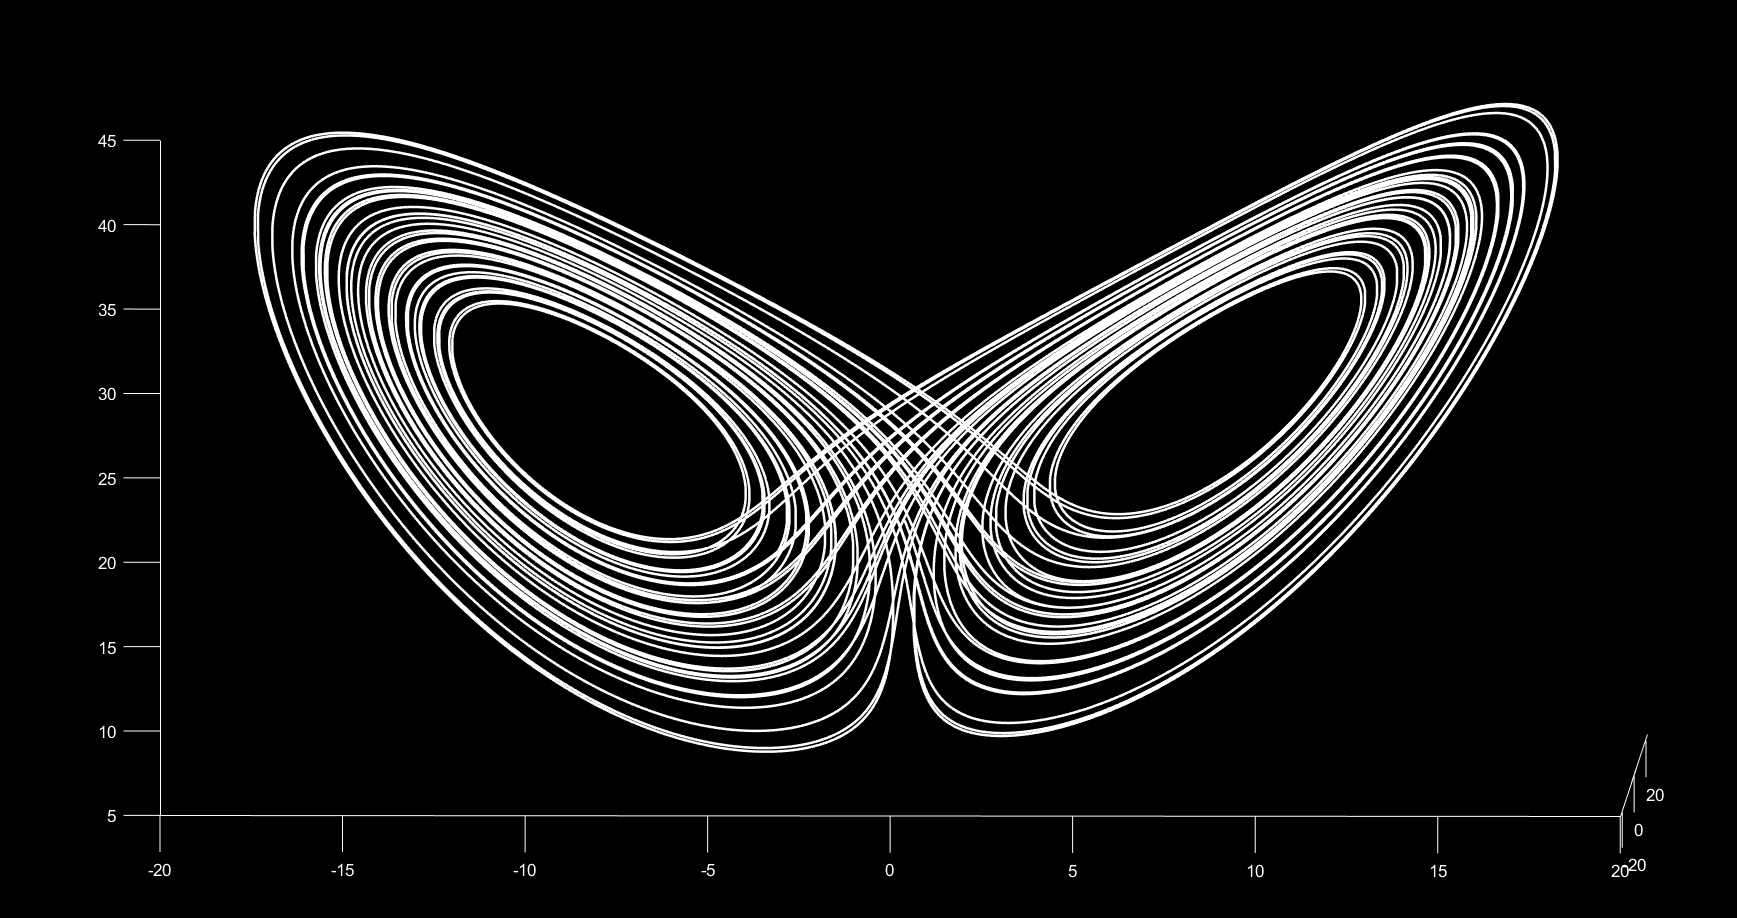

## Our overview and useful links.

Because the three equations are so codependent, their trajectories orbit back and forth between two centers but never cross. Such properties (combined with the sensitivity to initial conditions) are what makes systems chaotic. This system’s behavior depends on the three constant values chosen for the coefficients.

[__Python and Physics: Lorenz and Rossler Systems by Luis Morales__](https://medium.com/codex/python-and-physics-lorenz-and-rossler-systems-65735791f5a2)

[__MATHEMATICA TUTORIAL for the Second Course. Part III: Lorenz Equations by Prof. Vladimir Dobrushkin__](https://www.cfm.brown.edu/people/dobrush/am34/Mathematica/ch3/lorenz.html)

[__The Lorenz attractor by Mark Smath__](https://marksmath.org/visualization/LorenzExperiment/)

[__Lorenz system by Wikipedia__](https://en.wikipedia.org/wiki/Lorenz_system)

[__Simulating the Lorenz System in Matlab by Steve Brunton__](https://www.youtube.com/watch?v=EnsB1wP3LFM&ab_channel=SteveBrunton)

### Conclusion.

Transient chaos shows that a deterministic system can be unpredictable, even if its final states are very simple. This is familiar from everyday experience - many games of “chance” used in gambling are essentially demonstrations of transient chaos....e.g. a rolling dice...

Chaos does not arise from sheer size or complexity; rather, it can be a fundamental aspect of very simple systems.